In [1]:
import numpy as np 
import  numpy as np
import seaborn as sns
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import sys
from spinner_corr import spinner_correlation
from tqdm import tqdm 

In [2]:
p = 60
n = 100
B1 = 2 * np.ones((15, 15))
B2 = -2 * np.ones((12, 12))
B3 = 2 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 25)
np.all(np.linalg.eigvals(BB) > 0)

True

<AxesSubplot:>

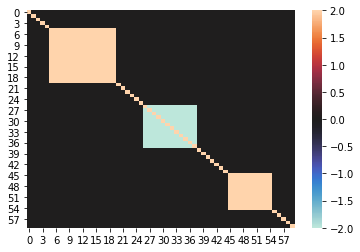

In [3]:
sns.heatmap(BB, center=0, vmin=-2, vmax=2)

In [4]:
A = [45,37,42,35,39]
B = [38,31,26,28,33]
C = [10,15,17,21,12]

data = np.array([A,B,C])

covMatrix = np.cov(data, bias = True)
print (covMatrix)

[[ 12.64   7.68  -9.6 ]
 [  7.68  17.36 -13.8 ]
 [ -9.6  -13.8   14.8 ]]


In [5]:
X = data.T
X = (X - np.mean(X, axis=0)) 
(X.T @X)/X.shape[0]

array([[ 12.64,   7.68,  -9.6 ],
       [  7.68,  17.36, -13.8 ],
       [ -9.6 , -13.8 ,  14.8 ]])

<AxesSubplot:>

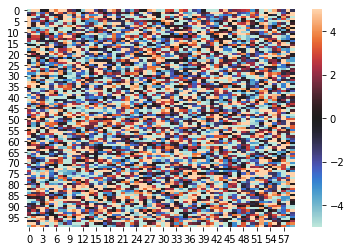

In [6]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
sns.heatmap(X, center=0, vmin=-5, vmax=5)

<AxesSubplot:>

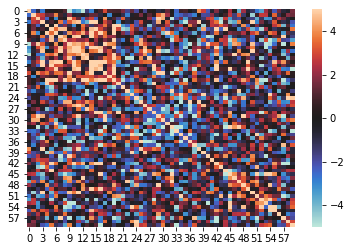

In [26]:
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
sns.heatmap(Y_checked , center=0, vmin=-5, vmax=5)

In [27]:
put_to_diagonal = np.diagonal(Y_checked).copy()
((Y_checked - BB)**2).sum()
# np.random.seed(2020)
# X = np.zeros((n, p))
# mean = np.zeros(p)
# cov = BB
# X = np.random.multivariate_normal(mean, cov, n)
# sns.heatmap(X, center=0, vmin=-5, vmax=5)

22881.289449225027

In [47]:
# X = (X - np.mean(X, axis=0))
# Y_checked = (X.T @X)/X.shape[0]
# sns.heatmap(Y_checked , center=0, vmin=-5, vmax=5)

6139.399148717997

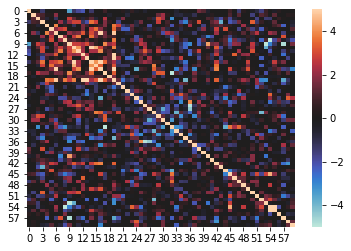

In [42]:
np.fill_diagonal(Y_checked,0)
Z = np.identity(Y_checked.shape[0])
out = spinner_correlation(Y_checked, Z, 5, 1.2)
B_estim = out["B"]
np.fill_diagonal(B_estim,put_to_diagonal)
sns.heatmap(B_estim, center=0, vmin=-5, vmax=5)
((B_estim - BB)**2).sum()

In [30]:
best_lambda_N = 0
best_lambda_L = 0
min_score = 60000
scope = np.arange(0.1,10,0.1)

for n in tqdm(scope):
    for l in scope:
        out = spinner_correlation(Y_checked, Z, n, l)
        B_estim = out["B"]
        np.fill_diagonal(B_estim,put_to_diagonal)
        residuals = ((B_estim - BB)**2).sum()
        if residuals < min_score:
            min_score = residuals
            best_lambda_N = n
            best_lambda_L = l
            print(f"Smallest Error : {min_score}, for LambdaN: {n} and LambdaL: {l}")
        else:
            continue


  0%|          | 0/99 [00:00<?, ?it/s]

Smallest Error : 21367.093431584537, for LambdaN: 0.1 and LambdaL: 0.1
Smallest Error : 20104.848475478244, for LambdaN: 0.1 and LambdaL: 0.2
Smallest Error : 18909.218107588356, for LambdaN: 0.1 and LambdaL: 0.30000000000000004
Smallest Error : 17778.58326153019, for LambdaN: 0.1 and LambdaL: 0.4
Smallest Error : 16709.756766481572, for LambdaN: 0.1 and LambdaL: 0.5
Smallest Error : 15697.703755543074, for LambdaN: 0.1 and LambdaL: 0.6
Smallest Error : 14740.732488802354, for LambdaN: 0.1 and LambdaL: 0.7000000000000001
Smallest Error : 13841.414098413614, for LambdaN: 0.1 and LambdaL: 0.8
Smallest Error : 12994.986276183583, for LambdaN: 0.1 and LambdaL: 0.9
Smallest Error : 12198.735659776561, for LambdaN: 0.1 and LambdaL: 1.0
Smallest Error : 11449.304753378954, for LambdaN: 0.1 and LambdaL: 1.1
Smallest Error : 10746.090369457588, for LambdaN: 0.1 and LambdaL: 1.2000000000000002
Smallest Error : 10086.752016580756, for LambdaN: 0.1 and LambdaL: 1.3000000000000003
Smallest Error : 


  1%|          | 1/99 [00:21<35:26, 21.70s/it]

Smallest Error : 2377.330712625637, for LambdaN: 0.2 and LambdaL: 6.4
Smallest Error : 2376.4884727941453, for LambdaN: 0.2 and LambdaL: 6.5



  2%|▏         | 2/99 [00:44<35:23, 21.89s/it]

Smallest Error : 2375.487952628748, for LambdaN: 0.30000000000000004 and LambdaL: 6.4
Smallest Error : 2375.1085261061717, for LambdaN: 0.30000000000000004 and LambdaL: 6.5



  3%|▎         | 3/99 [01:05<34:37, 21.64s/it]

Smallest Error : 2374.8276110403535, for LambdaN: 0.4 and LambdaL: 6.3
Smallest Error : 2374.0414452306295, for LambdaN: 0.4 and LambdaL: 6.4



  4%|▍         | 4/99 [01:25<33:38, 21.25s/it]

Smallest Error : 2373.2673787009353, for LambdaN: 0.5 and LambdaL: 6.3
Smallest Error : 2372.98998707355, for LambdaN: 0.5 and LambdaL: 6.4



  5%|▌         | 5/99 [01:46<33:06, 21.13s/it]

Smallest Error : 2372.758961235874, for LambdaN: 0.6 and LambdaL: 6.2
Smallest Error : 2372.0992921332445, for LambdaN: 0.6 and LambdaL: 6.3



  6%|▌         | 6/99 [02:06<32:32, 20.99s/it]

Smallest Error : 2371.862617053108, for LambdaN: 0.7000000000000001 and LambdaL: 6.0
Smallest Error : 2371.443997488865, for LambdaN: 0.7000000000000001 and LambdaL: 6.2
Smallest Error : 2371.321003465717, for LambdaN: 0.7000000000000001 and LambdaL: 6.3



  7%|▋         | 7/99 [02:27<32:06, 20.95s/it]

Smallest Error : 2371.1780736793753, for LambdaN: 0.8 and LambdaL: 5.5
Smallest Error : 2369.4595987917855, for LambdaN: 0.8 and LambdaL: 5.6
Smallest Error : 2369.2931263802466, for LambdaN: 0.8 and LambdaL: 5.7



  8%|▊         | 8/99 [02:48<31:43, 20.91s/it]

Smallest Error : 2367.2488845055086, for LambdaN: 0.9 and LambdaL: 5.5
Smallest Error : 2366.143758279058, for LambdaN: 0.9 and LambdaL: 5.6



  9%|▉         | 9/99 [03:09<31:22, 20.91s/it]

Smallest Error : 2365.4693558920458, for LambdaN: 1.0 and LambdaL: 5.4
Smallest Error : 2363.747298521268, for LambdaN: 1.0 and LambdaL: 5.5
Smallest Error : 2363.2356621076315, for LambdaN: 1.0 and LambdaL: 5.6



 10%|█         | 10/99 [03:33<32:18, 21.78s/it]

Smallest Error : 2361.7550770685907, for LambdaN: 1.1 and LambdaL: 5.4
Smallest Error : 2360.6668453221405, for LambdaN: 1.1 and LambdaL: 5.5



 11%|█         | 11/99 [03:56<32:45, 22.33s/it]

Smallest Error : 2360.159400362155, for LambdaN: 1.2000000000000002 and LambdaL: 5.3
Smallest Error : 2358.4656109239904, for LambdaN: 1.2000000000000002 and LambdaL: 5.4
Smallest Error : 2357.9977515708983, for LambdaN: 1.2000000000000002 and LambdaL: 5.5



 12%|█▏        | 12/99 [04:19<32:30, 22.42s/it]

Smallest Error : 2356.6416055369, for LambdaN: 1.3000000000000003 and LambdaL: 5.3
Smallest Error : 2355.5988068773077, for LambdaN: 1.3000000000000003 and LambdaL: 5.4



 13%|█▎        | 13/99 [04:41<31:57, 22.30s/it]

Smallest Error : 2354.826497029443, for LambdaN: 1.4000000000000001 and LambdaL: 5.2
Smallest Error : 2353.5476855399706, for LambdaN: 1.4000000000000001 and LambdaL: 5.3
Smallest Error : 2353.146427941856, for LambdaN: 1.4000000000000001 and LambdaL: 5.4



 14%|█▍        | 14/99 [05:03<31:27, 22.20s/it]

Smallest Error : 2351.478229291188, for LambdaN: 1.5000000000000002 and LambdaL: 5.2
Smallest Error : 2350.8727408860577, for LambdaN: 1.5000000000000002 and LambdaL: 5.3



 15%|█▌        | 15/99 [05:25<30:57, 22.11s/it]

Smallest Error : 2350.0454768452773, for LambdaN: 1.6 and LambdaL: 5.1
Smallest Error : 2348.5495554852046, for LambdaN: 1.6 and LambdaL: 5.2



 16%|█▌        | 16/99 [05:47<30:36, 22.13s/it]

Smallest Error : 2346.8269481433713, for LambdaN: 1.7000000000000002 and LambdaL: 5.1
Smallest Error : 2346.031185181966, for LambdaN: 1.7000000000000002 and LambdaL: 5.2



 17%|█▋        | 17/99 [06:09<30:14, 22.13s/it]

Smallest Error : 2345.2586242942284, for LambdaN: 1.8000000000000003 and LambdaL: 5.0
Smallest Error : 2344.020012635151, for LambdaN: 1.8000000000000003 and LambdaL: 5.1
Smallest Error : 2343.909506363042, for LambdaN: 1.8000000000000003 and LambdaL: 5.2



 18%|█▊        | 18/99 [06:32<30:10, 22.35s/it]

Smallest Error : 2342.146532908563, for LambdaN: 1.9000000000000001 and LambdaL: 5.0
Smallest Error : 2341.6111459284502, for LambdaN: 1.9000000000000001 and LambdaL: 5.1



 19%|█▉        | 19/99 [06:54<29:46, 22.33s/it]

Smallest Error : 2340.990596460637, for LambdaN: 2.0 and LambdaL: 4.9
Smallest Error : 2339.4365475828818, for LambdaN: 2.0 and LambdaL: 5.0



 20%|██        | 20/99 [07:18<29:49, 22.66s/it]

Smallest Error : 2337.916982646451, for LambdaN: 2.1 and LambdaL: 4.9
Smallest Error : 2337.113680144047, for LambdaN: 2.1 and LambdaL: 5.0



 21%|██        | 21/99 [07:41<29:36, 22.77s/it]

Smallest Error : 2336.3729862032337, for LambdaN: 2.2 and LambdaL: 4.8
Smallest Error : 2335.241075334469, for LambdaN: 2.2 and LambdaL: 4.9
Smallest Error : 2335.157129825556, for LambdaN: 2.2 and LambdaL: 5.0



 22%|██▏       | 22/99 [08:02<28:39, 22.33s/it]

Smallest Error : 2334.2805944104502, for LambdaN: 2.3000000000000003 and LambdaL: 4.7
Smallest Error : 2333.3101415236483, for LambdaN: 2.3000000000000003 and LambdaL: 4.8
Smallest Error : 2332.9423672323583, for LambdaN: 2.3000000000000003 and LambdaL: 4.9



 23%|██▎       | 23/99 [08:23<27:38, 21.82s/it]

Smallest Error : 2331.2511564494307, for LambdaN: 2.4000000000000004 and LambdaL: 4.6
Smallest Error : 2330.885496556709, for LambdaN: 2.4000000000000004 and LambdaL: 4.7
Smallest Error : 2330.6271115808704, for LambdaN: 2.4000000000000004 and LambdaL: 4.8



 24%|██▍       | 24/99 [08:43<26:46, 21.42s/it]

Smallest Error : 2328.9196095429243, for LambdaN: 2.5000000000000004 and LambdaL: 4.5
Smallest Error : 2327.614809785443, for LambdaN: 2.5000000000000004 and LambdaL: 4.6



 25%|██▌       | 25/99 [09:05<26:34, 21.55s/it]

Smallest Error : 2324.9905906862923, for LambdaN: 2.6 and LambdaL: 4.5
Smallest Error : 2324.319244701561, for LambdaN: 2.6 and LambdaL: 4.6



 26%|██▋       | 26/99 [09:28<26:41, 21.94s/it]

Smallest Error : 2323.4572173743372, for LambdaN: 2.7 and LambdaL: 4.3999999999999995
Smallest Error : 2321.429390625707, for LambdaN: 2.7 and LambdaL: 4.5
Smallest Error : 2321.381791381048, for LambdaN: 2.7 and LambdaL: 4.6



 27%|██▋       | 27/99 [09:49<25:49, 21.52s/it]

Smallest Error : 2319.5343858680117, for LambdaN: 2.8000000000000003 and LambdaL: 4.3999999999999995
Smallest Error : 2318.231718803359, for LambdaN: 2.8000000000000003 and LambdaL: 4.5



 28%|██▊       | 28/99 [10:10<25:24, 21.47s/it]

Smallest Error : 2315.9715801602133, for LambdaN: 2.9000000000000004 and LambdaL: 4.3999999999999995
Smallest Error : 2315.3800591308063, for LambdaN: 2.9000000000000004 and LambdaL: 4.5



 29%|██▉       | 29/99 [10:30<24:42, 21.18s/it]

Smallest Error : 2314.5934923846303, for LambdaN: 3.0000000000000004 and LambdaL: 4.3
Smallest Error : 2312.76801649141, for LambdaN: 3.0000000000000004 and LambdaL: 4.3999999999999995



 30%|███       | 30/99 [10:51<24:10, 21.02s/it]

Smallest Error : 2310.9125614178565, for LambdaN: 3.1 and LambdaL: 4.3
Smallest Error : 2309.910156556225, for LambdaN: 3.1 and LambdaL: 4.3999999999999995



 31%|███▏      | 31/99 [11:12<23:45, 20.96s/it]

Smallest Error : 2309.554237285168, for LambdaN: 3.2 and LambdaL: 4.2
Smallest Error : 2307.60102281256, for LambdaN: 3.2 and LambdaL: 4.3
Smallest Error : 2307.389790546213, for LambdaN: 3.2 and LambdaL: 4.3999999999999995



 32%|███▏      | 32/99 [11:32<23:12, 20.78s/it]

Smallest Error : 2305.8260398279936, for LambdaN: 3.3000000000000003 and LambdaL: 4.2
Smallest Error : 2304.645986584116, for LambdaN: 3.3000000000000003 and LambdaL: 4.3



 33%|███▎      | 33/99 [11:53<22:43, 20.66s/it]

Smallest Error : 2302.4590587770417, for LambdaN: 3.4000000000000004 and LambdaL: 4.2
Smallest Error : 2302.035288562581, for LambdaN: 3.4000000000000004 and LambdaL: 4.3



 34%|███▍      | 34/99 [12:14<22:28, 20.75s/it]

Smallest Error : 2301.3164048623557, for LambdaN: 3.5000000000000004 and LambdaL: 4.1
Smallest Error : 2299.4669066503366, for LambdaN: 3.5000000000000004 and LambdaL: 4.2



 35%|███▌      | 35/99 [12:34<22:03, 20.67s/it]

Smallest Error : 2297.823876805882, for LambdaN: 3.6 and LambdaL: 4.1
Smallest Error : 2296.808949357909, for LambdaN: 3.6 and LambdaL: 4.2



 36%|███▋      | 36/99 [12:54<21:19, 20.31s/it]

Smallest Error : 2296.2412232362494, for LambdaN: 3.7 and LambdaL: 4.0
Smallest Error : 2294.6805471433245, for LambdaN: 3.7 and LambdaL: 4.1
Smallest Error : 2294.499599519692, for LambdaN: 3.7 and LambdaL: 4.2



 37%|███▋      | 37/99 [13:17<21:58, 21.27s/it]

Smallest Error : 2292.6169168858387, for LambdaN: 3.8000000000000003 and LambdaL: 4.0
Smallest Error : 2291.8558485670155, for LambdaN: 3.8000000000000003 and LambdaL: 4.1



 38%|███▊      | 38/99 [13:38<21:35, 21.24s/it]

Smallest Error : 2291.792397444923, for LambdaN: 3.9000000000000004 and LambdaL: 3.9000000000000004
Smallest Error : 2289.3413595315874, for LambdaN: 3.9000000000000004 and LambdaL: 4.0
Smallest Error : 2289.3191831661884, for LambdaN: 3.9000000000000004 and LambdaL: 4.1



 39%|███▉      | 39/99 [14:00<21:23, 21.39s/it]

Smallest Error : 2287.842812377521, for LambdaN: 4.0 and LambdaL: 3.9000000000000004
Smallest Error : 2286.354467618702, for LambdaN: 4.0 and LambdaL: 4.0



 40%|████      | 40/99 [14:21<20:57, 21.31s/it]

Smallest Error : 2284.266032790232, for LambdaN: 4.1 and LambdaL: 3.9000000000000004
Smallest Error : 2283.703080352462, for LambdaN: 4.1 and LambdaL: 4.0



 41%|████▏     | 41/99 [14:44<20:55, 21.65s/it]

Smallest Error : 2282.859822372501, for LambdaN: 4.2 and LambdaL: 3.8000000000000003
Smallest Error : 2281.058186074567, for LambdaN: 4.2 and LambdaL: 3.9000000000000004



 42%|████▏     | 42/99 [15:04<20:21, 21.43s/it]

Smallest Error : 2279.1209566077177, for LambdaN: 4.3 and LambdaL: 3.8000000000000003
Smallest Error : 2278.191366108627, for LambdaN: 4.3 and LambdaL: 3.9000000000000004



 43%|████▎     | 43/99 [15:25<19:41, 21.09s/it]

Smallest Error : 2278.015042179655, for LambdaN: 4.3999999999999995 and LambdaL: 3.7
Smallest Error : 2275.625976371872, for LambdaN: 4.3999999999999995 and LambdaL: 3.8000000000000003



 44%|████▍     | 44/99 [15:48<19:54, 21.72s/it]

Smallest Error : 2273.836981078709, for LambdaN: 4.5 and LambdaL: 3.7
Smallest Error : 2272.4127130215547, for LambdaN: 4.5 and LambdaL: 3.8000000000000003



 45%|████▌     | 45/99 [16:10<19:44, 21.93s/it]

Smallest Error : 2270.041786517365, for LambdaN: 4.6 and LambdaL: 3.7
Smallest Error : 2269.5428946599163, for LambdaN: 4.6 and LambdaL: 3.8000000000000003



 46%|████▋     | 46/99 [16:34<19:50, 22.46s/it]

Smallest Error : 2266.6456645729954, for LambdaN: 4.7 and LambdaL: 3.7



 47%|████▋     | 47/99 [16:59<20:01, 23.11s/it]

Smallest Error : 2265.878593915264, for LambdaN: 4.8 and LambdaL: 3.6
Smallest Error : 2263.6154656796784, for LambdaN: 4.8 and LambdaL: 3.7



 48%|████▊     | 48/99 [17:24<20:10, 23.74s/it]

Smallest Error : 2262.229879307081, for LambdaN: 4.9 and LambdaL: 3.6
Smallest Error : 2260.9346865325174, for LambdaN: 4.9 and LambdaL: 3.7



 49%|████▉     | 49/99 [17:48<19:55, 23.91s/it]

Smallest Error : 2258.9604433229824, for LambdaN: 5.0 and LambdaL: 3.6
Smallest Error : 2258.614853091663, for LambdaN: 5.0 and LambdaL: 3.7



 51%|█████     | 50/99 [18:09<18:48, 23.03s/it]

Smallest Error : 2258.6031886821584, for LambdaN: 5.1 and LambdaL: 3.5000000000000004
Smallest Error : 2256.0975113853096, for LambdaN: 5.1 and LambdaL: 3.6



 52%|█████▏    | 51/99 [18:31<18:01, 22.54s/it]

Smallest Error : 2254.798427244937, for LambdaN: 5.2 and LambdaL: 3.5000000000000004
Smallest Error : 2253.597269178132, for LambdaN: 5.2 and LambdaL: 3.6



 53%|█████▎    | 52/99 [18:48<16:34, 21.16s/it]

Smallest Error : 2251.363854185534, for LambdaN: 5.3 and LambdaL: 3.5000000000000004



 54%|█████▎    | 53/99 [19:06<15:24, 20.11s/it]

Smallest Error : 2251.026702021687, for LambdaN: 5.4 and LambdaL: 3.4000000000000004
Smallest Error : 2248.315283717555, for LambdaN: 5.4 and LambdaL: 3.5000000000000004



 55%|█████▍    | 54/99 [19:29<15:40, 20.91s/it]

Smallest Error : 2247.208016746893, for LambdaN: 5.5 and LambdaL: 3.4000000000000004
Smallest Error : 2245.6379260895446, for LambdaN: 5.5 and LambdaL: 3.5000000000000004



 56%|█████▌    | 55/99 [19:47<14:44, 20.10s/it]

Smallest Error : 2243.773583985464, for LambdaN: 5.6 and LambdaL: 3.4000000000000004
Smallest Error : 2243.2980814955163, for LambdaN: 5.6 and LambdaL: 3.5000000000000004



 57%|█████▋    | 56/99 [20:06<14:13, 19.84s/it]

Smallest Error : 2240.7050176417724, for LambdaN: 5.7 and LambdaL: 3.4000000000000004



 58%|█████▊    | 57/99 [20:27<14:08, 20.21s/it]

Smallest Error : 2239.932190277833, for LambdaN: 5.8 and LambdaL: 3.3000000000000003
Smallest Error : 2237.9938134942986, for LambdaN: 5.8 and LambdaL: 3.4000000000000004



 59%|█████▊    | 58/99 [20:47<13:44, 20.11s/it]

Smallest Error : 2236.3315105940897, for LambdaN: 5.9 and LambdaL: 3.3000000000000003
Smallest Error : 2235.5234088332318, for LambdaN: 5.9 and LambdaL: 3.4000000000000004



 60%|█████▉    | 59/99 [21:07<13:18, 19.97s/it]

Smallest Error : 2233.1008470486104, for LambdaN: 6.0 and LambdaL: 3.3000000000000003



 61%|██████    | 60/99 [21:25<12:34, 19.35s/it]

Smallest Error : 2230.228168720616, for LambdaN: 6.1 and LambdaL: 3.3000000000000003



 62%|██████▏   | 61/99 [21:43<11:57, 18.89s/it]

Smallest Error : 2229.6572015540787, for LambdaN: 6.2 and LambdaL: 3.2
Smallest Error : 2227.7258802070683, for LambdaN: 6.2 and LambdaL: 3.3000000000000003



 63%|██████▎   | 62/99 [22:01<11:38, 18.87s/it]

Smallest Error : 2226.286269862365, for LambdaN: 6.3 and LambdaL: 3.2
Smallest Error : 2225.570782797723, for LambdaN: 6.3 and LambdaL: 3.3000000000000003



 64%|██████▎   | 63/99 [22:20<11:16, 18.79s/it]

Smallest Error : 2223.3059373505093, for LambdaN: 6.4 and LambdaL: 3.2



 65%|██████▍   | 64/99 [22:39<10:58, 18.82s/it]

Smallest Error : 2220.6799119709685, for LambdaN: 6.5 and LambdaL: 3.2



 66%|██████▌   | 65/99 [22:57<10:35, 18.69s/it]

Smallest Error : 2220.2499932457577, for LambdaN: 6.6 and LambdaL: 3.1
Smallest Error : 2218.366442431038, for LambdaN: 6.6 and LambdaL: 3.2



 67%|██████▋   | 66/99 [23:16<10:19, 18.79s/it]

Smallest Error : 2217.0950133344004, for LambdaN: 6.7 and LambdaL: 3.1
Smallest Error : 2216.404847732767, for LambdaN: 6.7 and LambdaL: 3.2



 68%|██████▊   | 67/99 [23:37<10:20, 19.38s/it]

Smallest Error : 2214.3093554768125, for LambdaN: 6.8 and LambdaL: 3.1



 69%|██████▊   | 68/99 [24:48<18:00, 34.86s/it]

Smallest Error : 2211.865011443006, for LambdaN: 6.9 and LambdaL: 3.1



 70%|██████▉   | 69/99 [26:29<27:21, 54.72s/it]

Smallest Error : 2209.767869131982, for LambdaN: 7.0 and LambdaL: 3.1



 71%|███████   | 70/99 [26:47<21:01, 43.50s/it]

Smallest Error : 2208.842203123833, for LambdaN: 7.1 and LambdaL: 3.0000000000000004
Smallest Error : 2208.008147179002, for LambdaN: 7.1 and LambdaL: 3.1



 72%|███████▏  | 71/99 [27:06<16:55, 36.26s/it]

Smallest Error : 2206.050130191701, for LambdaN: 7.2 and LambdaL: 3.0000000000000004



 73%|███████▎  | 72/99 [28:19<21:17, 47.31s/it]

Smallest Error : 2203.586407351714, for LambdaN: 7.3 and LambdaL: 3.0000000000000004



 74%|███████▎  | 73/99 [28:37<16:39, 38.43s/it]

Smallest Error : 2201.443640039293, for LambdaN: 7.4 and LambdaL: 3.0000000000000004



 75%|███████▍  | 74/99 [29:07<14:57, 35.88s/it]

Smallest Error : 2200.786148097518, for LambdaN: 7.5 and LambdaL: 2.9000000000000004
Smallest Error : 2199.654177136502, for LambdaN: 7.5 and LambdaL: 3.0000000000000004



 76%|███████▌  | 75/99 [29:27<12:28, 31.17s/it]

Smallest Error : 2197.8753362763346, for LambdaN: 7.6 and LambdaL: 2.9000000000000004



 77%|███████▋  | 76/99 [29:47<10:39, 27.80s/it]

Smallest Error : 2195.347511664067, for LambdaN: 7.7 and LambdaL: 2.9000000000000004



 78%|███████▊  | 77/99 [30:05<09:08, 24.95s/it]

Smallest Error : 2193.1822339936402, for LambdaN: 7.8 and LambdaL: 2.9000000000000004



 79%|███████▉  | 78/99 [30:22<07:53, 22.57s/it]

Smallest Error : 2191.4140892496443, for LambdaN: 7.9 and LambdaL: 2.9000000000000004



 80%|███████▉  | 79/99 [30:39<06:55, 20.80s/it]

Smallest Error : 2190.349599902098, for LambdaN: 8.0 and LambdaL: 2.8000000000000003
Smallest Error : 2190.0102747973006, for LambdaN: 8.0 and LambdaL: 2.9000000000000004



 81%|████████  | 80/99 [30:57<06:18, 19.92s/it]

Smallest Error : 2187.804601893598, for LambdaN: 8.1 and LambdaL: 2.8000000000000003



 82%|████████▏ | 81/99 [31:14<05:43, 19.08s/it]

Smallest Error : 2185.6254145865378, for LambdaN: 8.2 and LambdaL: 2.8000000000000003



 83%|████████▎ | 82/99 [31:30<05:09, 18.18s/it]

Smallest Error : 2183.6488972223297, for LambdaN: 8.3 and LambdaL: 2.8000000000000003



 84%|████████▍ | 83/99 [31:48<04:49, 18.06s/it]

Smallest Error : 2182.000589439044, for LambdaN: 8.4 and LambdaL: 2.8000000000000003



 85%|████████▍ | 84/99 [32:04<04:25, 17.68s/it]

Smallest Error : 2180.7691241599355, for LambdaN: 8.5 and LambdaL: 2.7
Smallest Error : 2180.7008801207244, for LambdaN: 8.5 and LambdaL: 2.8000000000000003



 86%|████████▌ | 85/99 [32:20<04:00, 17.20s/it]

Smallest Error : 2178.1343773289427, for LambdaN: 8.6 and LambdaL: 2.7



 87%|████████▋ | 86/99 [32:38<03:43, 17.17s/it]

Smallest Error : 2175.876045059765, for LambdaN: 8.7 and LambdaL: 2.7



 88%|████████▊ | 87/99 [32:54<03:21, 16.81s/it]

Smallest Error : 2173.9916701017955, for LambdaN: 8.8 and LambdaL: 2.7



 89%|████████▉ | 88/99 [33:08<02:58, 16.19s/it]

Smallest Error : 2172.458301350993, for LambdaN: 8.9 and LambdaL: 2.7



 90%|████████▉ | 89/99 [33:24<02:41, 16.18s/it]

Smallest Error : 2171.4789706295696, for LambdaN: 9.0 and LambdaL: 2.6
Smallest Error : 2171.2502119252117, for LambdaN: 9.0 and LambdaL: 2.7



 91%|█████████ | 90/99 [33:44<02:34, 17.13s/it]

Smallest Error : 2169.0174900821303, for LambdaN: 9.1 and LambdaL: 2.6



 92%|█████████▏| 91/99 [33:59<02:12, 16.52s/it]

Smallest Error : 2166.8930796245895, for LambdaN: 9.2 and LambdaL: 2.6



 93%|█████████▎| 92/99 [34:15<01:55, 16.53s/it]

Smallest Error : 2165.110118124051, for LambdaN: 9.3 and LambdaL: 2.6



 94%|█████████▍| 93/99 [34:32<01:38, 16.40s/it]

Smallest Error : 2163.6587564723554, for LambdaN: 9.4 and LambdaL: 2.6



 95%|█████████▍| 94/99 [34:52<01:28, 17.77s/it]

Smallest Error : 2162.913291114857, for LambdaN: 9.5 and LambdaL: 2.5000000000000004
Smallest Error : 2162.542960927649, for LambdaN: 9.5 and LambdaL: 2.6



 96%|█████████▌| 95/99 [35:09<01:09, 17.31s/it]

Smallest Error : 2160.509535748474, for LambdaN: 9.6 and LambdaL: 2.5000000000000004



 97%|█████████▋| 96/99 [35:26<00:51, 17.30s/it]

Smallest Error : 2158.4650863857382, for LambdaN: 9.700000000000001 and LambdaL: 2.5000000000000004



 98%|█████████▊| 97/99 [35:41<00:33, 16.71s/it]

Smallest Error : 2156.7093801127435, for LambdaN: 9.8 and LambdaL: 2.5000000000000004



 99%|█████████▉| 98/99 [35:59<00:16, 16.88s/it]

Smallest Error : 2155.2026292480487, for LambdaN: 9.9 and LambdaL: 2.5000000000000004



100%|██████████| 99/99 [36:14<00:00, 21.97s/it]


<AxesSubplot:>

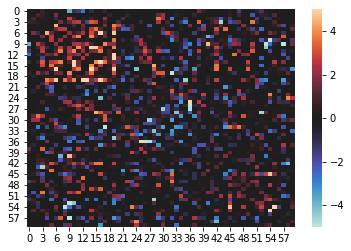

In [32]:
np.fill_diagonal(Y_checked,0)
Z = np.identity(Y_checked.shape[0])
out = spinner_correlation(Y_checked, Z, 1, 2)
sns.heatmap(out["B"], center=0, vmin=-5, vmax=5)

# Porównanie

<AxesSubplot:>

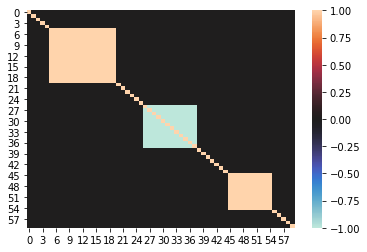

In [94]:
p = 60
n = 100
B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((12, 12))
B3 = 1 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 12)
np.all(np.linalg.eigvals(BB) > 0)
sns.heatmap(BB, center=0, vmin=-1, vmax=1)

<AxesSubplot:>

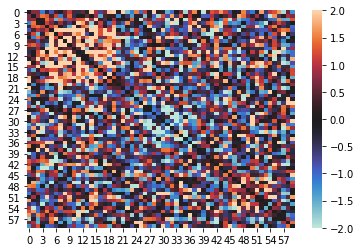

In [97]:
X = np.zeros((n, p))
mean = np.zeros(p)
cov = BB
np.random.seed(2020)
for row in range(X.shape[0]):
    X[row, :] = np.random.multivariate_normal(mean, cov, 1)
    
X = (X - np.mean(X, axis=0))
Y_checked = (X.T @X)/X.shape[0]
put_to_diagonal = np.diagonal(Y_checked).copy()
np.fill_diagonal(Y_checked,0)
sns.heatmap(Y_checked , center=0, vmin=-2, vmax=2)

<AxesSubplot:>

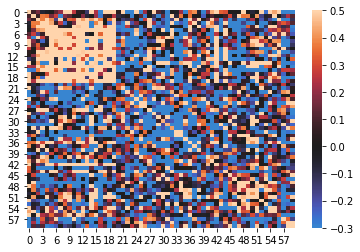

In [103]:
out = spinner_correlation(Y_checked, Z, 7, 0.15)
sns.heatmap(out["B"], center=0, vmin=-0.3, vmax=0.5)

<AxesSubplot:>

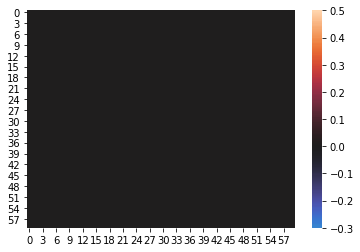

In [108]:
out = spinner_correlation(out["B"], Z, 7, 0.15)
sns.heatmap(out["B"], center=0, vmin=-0.3, vmax=0.5)

# DAMIANCZI PRACA


<AxesSubplot:>

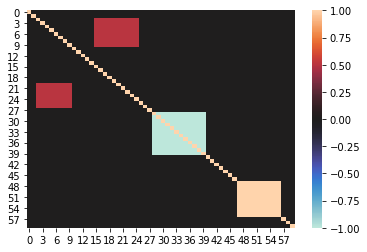

In [69]:
p = 60
n = 100
#B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((12, 12))
B3 = 1 * np.ones((10, 10))
s_nods =  B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 35  #
BB = block_diag(np.zeros((20, 20)), np.zeros((8, 8)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 25)
np.all(np.linalg.eigvals(BB) > 0)

BB[2:10,15:25] = 0.5
BB[20:27, 2:10] =0.5

sns.heatmap(BB, center=0, vmin=-1, vmax=1)

In [91]:
p = 60
n = 100
B1 = 1 * np.ones((15, 15))
B2 = -1 * np.ones((12, 12))
B3 = 1 * np.ones((10, 10))
s_nods = B1.shape[0] + B2.shape[0] + B3.shape[0]
left_square = p - s_nods - 18  #
BB = block_diag(np.zeros((5, 5)), B1, np.zeros((6, 6)), B2, np.zeros((7, 7)), B3,
                np.zeros((left_square, left_square)))
np.fill_diagonal(BB, 15)
np.all(np.linalg.eigvals(BB) > 0)


True

<AxesSubplot:>

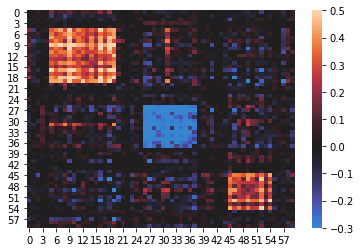

In [105]:
Y_magic = BB + np.random.randn(p, p)
np.fill_diagonal(Y_magic, 0)
out = spinner_correlation(Y_magic, Z, 7, 0.15)
sns.heatmap(out["B"], center=0, vmin=-0.3, vmax=0.5)

In [106]:
((out["B"]- BB)**2).sum()

8790.967530967268

<AxesSubplot:>

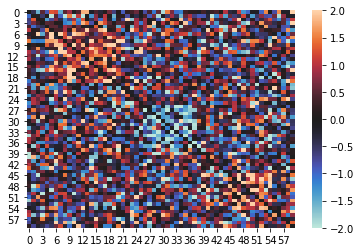

In [107]:
sns.heatmap(Y_magic, center=0, vmin=-2, vmax=2)

((50, 1), (50, 1))

In [57]:
p = 50 
v1 = np.zeros(p)
v1[1:7] = 1
v2 = np.zeros(p)
v2[19:27]=1
v3 = np.zeros(p)
v3[40:45] = 1
v4 = np.zeros(p)
v4[31:38] = 1
    
    

In [61]:
v1.reshape(1,-1) @ v2

array([0.])